In [1]:
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')

from soundscape_viewer import lts_viewer
from soundscape_viewer import gdrive_handle
from source_separation import pcnmf
from soundscape_viewer import data_organize, clustering
from source_separation import source_separation
from utility import matrix_operation
import interactive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
model=source_separation(filename='../Results/soundsepration/Taoyuan-5min/20231204_101821_2023_3stage_separation/Separation_3stages.mat')


Model parameters check
Minima and maxima frequancy bin: 187.5 Hz and 48000.0 Hz
Frequancy resolution: 93.75 Hz
Feature length: 6
Number of basis: 30
Number of source: 2
Sparseness: 0


In [3]:
LTS=lts_viewer(path='./../DataBase/PAM_pickle/Taoyuan/')
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,48000])#

./../DataBase/PAM_pickle/Taoyuan/qqq/
Loading file: ./../DataBase/PAM_pickle/Taoyuan/qqq/Taoyuan_060808-062321-5min.pkl
(4488, 512)
(4488, 511)


(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

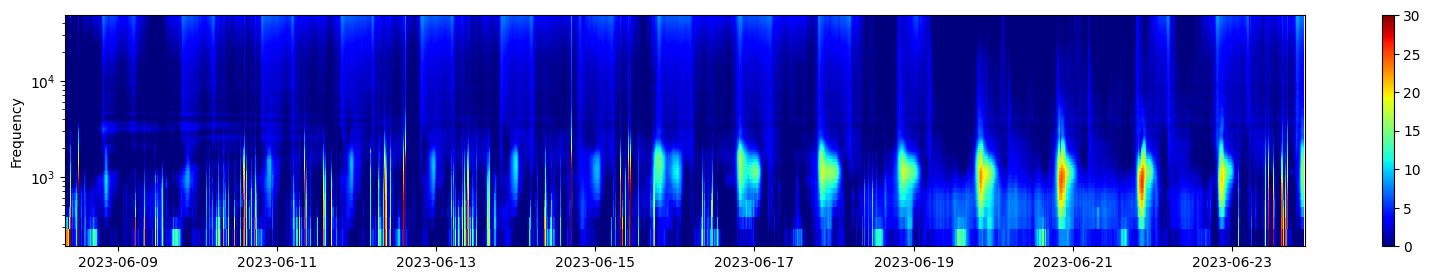

In [4]:
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=30, fig_width=20, fig_height=3, lts=False)

In [5]:
model.prediction(input_data=input_data, f=f, time=time)

Add additional basis for feature learning (semi-supervised NMF)
supervised NMF
Begining to iteration
Running source 1
Running source 2


/Users/tong/soundscape_IR/soundscape_viewer/source_separation.py:443: RuntimeWarning: invalid value encountered in divide
  mask=np.divide(source,source0)


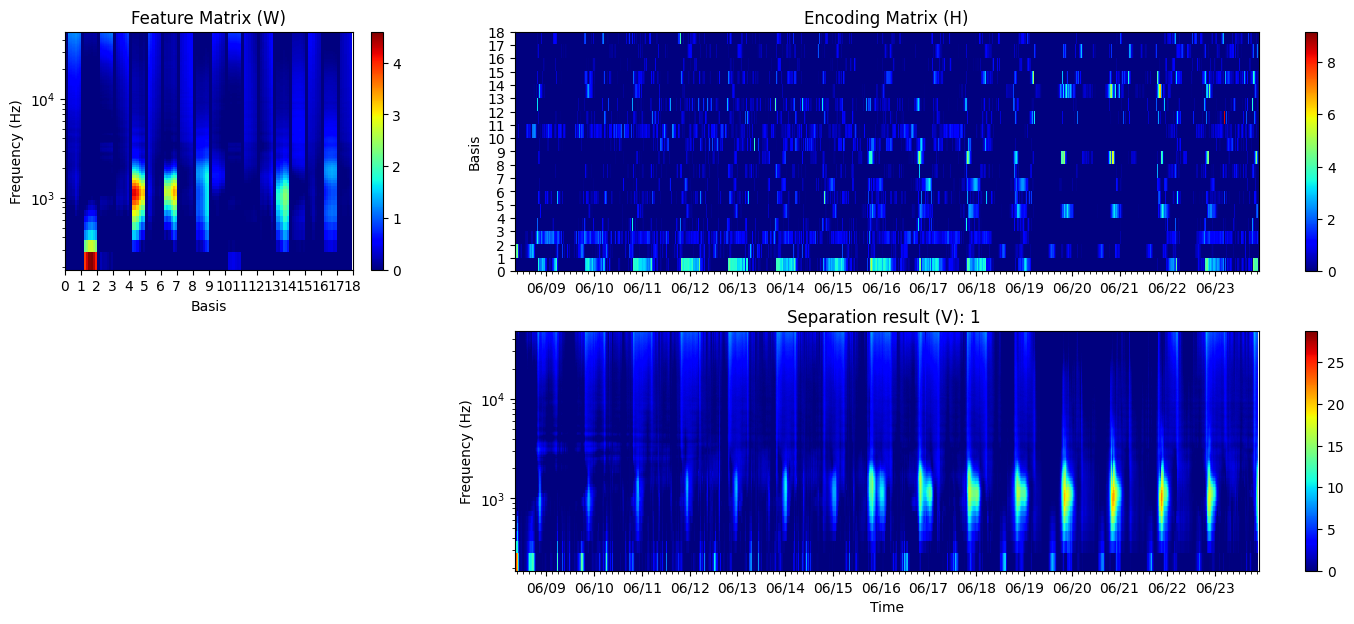

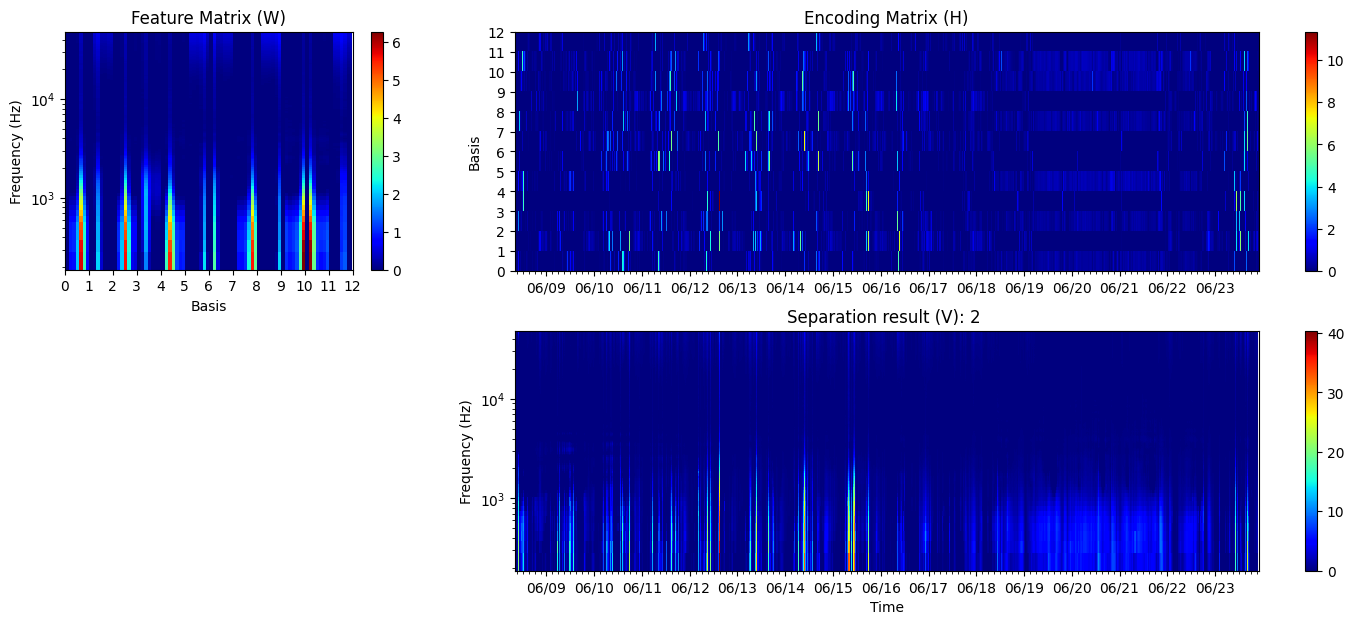

In [7]:
save = True
source_num=model.source_num
for n in range(1, source_num+1):
    model.plot_nmf(source = n, savefig = save, log=True, folder='../ForCF/')#freq_range=[0,25000]) 

In [ ]:
analysis_result=data_organize()
for s in range(1, model.source_num+1):
    print(f'Source: {s}')
    analysis_result.time_fill(time_vec=model.time_vec, data=model.relative_level[s-1], header=f'S{s}_level')
    
    cluster_result=clustering(pca_percent=0.9, k=0.75)
    # Run clustering on separated source
    cluster_result.run(input_data=model.separation[s-1], f=f, time=time)   
    # cluster_result.save_cluster_feature(filename=f'./qqq/S{s}_cluster_scene_features.csv')
    analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')
        
# analysis_result.save_csv('./qqq/qqq.csv')

In [8]:
!open .